In [83]:
import matplotlib.pyplot as plt
import requests
import json
from collections import Counter

with open("../sample_data/gxd.json", 'r') as f:
    gxd = json.load(f)

jaxid2relevance = {}
for el in gxd:
    jaxid2relevance[el["jaxid"]] = el["relevant"]


all:  Counter({'relevant': 11, 'irrelevant': 8})
subset:  Counter({'relevant': 11, 'irrelevant': 8})


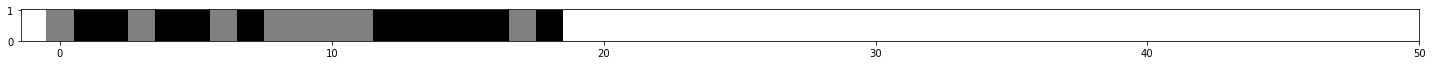

In [76]:
def get_ground_truth(q: str, modalities: str, max=20):
  query = f"https://runachay.evl.uic.edu/search-gxd/search/?highlight=true&ft=false&q={q}&max_docs=2000&ds=gxd"
  if modalities is not None:
    query = f"{query}&modalities={modalities}"

  response = requests.get(query)
  relevance2number = {"relevant": 1, "irrelevant": 0}

  relevances = [jaxid2relevance[el["otherid"]] for el in response.json()]
  print("all: ", Counter(relevances))

  relevances = relevances[:max]
  relevance_numbers = [relevance2number[el] for el in relevances]

  x = range(len(relevance_numbers))
  y_rel = relevance_numbers
  y_not_rel = [1 if el == 0 else 0 for el in y_rel]

  print("subset: ", Counter(relevances))

  plt.figure(figsize=(20,1))
  plt.bar(x, y_rel, width=1.0, color="black")
  plt.bar(x, y_not_rel, width=1.0, color="gray")
  plt.xticks(range(0,max+1,10))
  plt.yticks([0, 1])
  # plt.axvline(x=len(relevance_numbers), color='r')
  plt.tight_layout()

# title:kidney%20AND%20abstract:mouse
get_ground_truth('cystic', 'mic.lig', max=50)

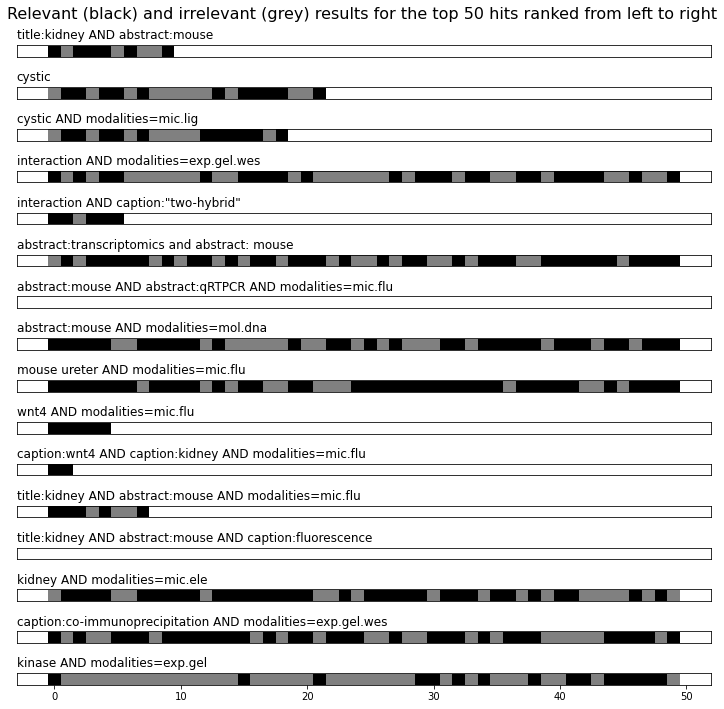

In [106]:
def plot_results(qs: list[str], modalities_arr: list[str], max=20):

  fig, axs = plt.subplots(len(qs), figsize=(10, 10))
  idx = 0

  for q, modalities in zip(qs, modalities_arr):
    query = f"https://runachay.evl.uic.edu/search-gxd/search/?highlight=true&ft=false&q={q}&max_docs={max}&ds=gxd"
    if modalities is not None:
      query = f"{query}&modalities={modalities}"

    response = requests.get(query)
    relevance2number = {"relevant": 1, "irrelevant": 0}

    relevances = [jaxid2relevance[el["otherid"]] for el in response.json()]
    relevance_numbers = [relevance2number[el] for el in relevances]
    # plot bar for relevant and irrelevant

    x = range(max)        
    y_rel = relevance_numbers
    y_not_rel = [1 if el == 0 else 0 for el in y_rel]

    while len(y_rel) < max:
      y_rel.append(0)
    while len(y_not_rel) < max:
      y_not_rel.append(0)

    axs[idx].bar(x, y_rel, width=1.0, color="black")
    axs[idx].bar(x, y_not_rel, width=1.0, color="gray")    
    axs[idx].yaxis.set_visible(False)
    if idx == len(qs)-1:
      axs[idx].set_xticks(range(0,max+1,10))
    else:
      axs[idx].xaxis.set_visible(False)

    title = q
    if modalities:
      title = f"{title} AND modalities={modalities}"
    axs[idx].set_title(title, loc="left")

    idx += 1
  
  fig.suptitle('Relevant (black) and irrelevant (grey) results for the top 50 hits ranked from left to right', fontsize=16)
  fig.tight_layout()


queries = [
  'title:kidney AND abstract:mouse', 
  'cystic',
  'cystic',
  'interaction',
  'interaction AND caption:"two-hybrid"',
  'abstract:transcriptomics and abstract: mouse',
  'abstract:mouse AND abstract:qRTPCR',
  'abstract:mouse',
  'mouse ureter',
  'wnt4',
  'caption:wnt4 AND caption:kidney',
  'title:kidney AND abstract:mouse',
  'title:kidney AND abstract:mouse AND caption:fluorescence',
  'kidney',
  'caption:co-immunoprecipitation',
  'kinase'
]
modalities_arr = [
  None,
  None,
  'mic.lig',
  'exp.gel.wes',
  None,
  None,
  'mic.flu',
  'mol.dna',
  'mic.flu',
  'mic.flu',
  'mic.flu',
  'mic.flu',
  None,
  'mic.ele',
  'exp.gel.wes',
  'exp.gel'
]

plot_results(queries, modalities_arr, max=50)

# title:kidney%20AND%20abstract:mouse